In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

# Detect faces

In [2]:
app=FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0,det_size=(640,640))

/home/ariel/.cache/pypoetry/virtualenvs/src-2ezwFDKK-py3.8/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ariel/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ariel/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ariel/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ariel/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ariel/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det

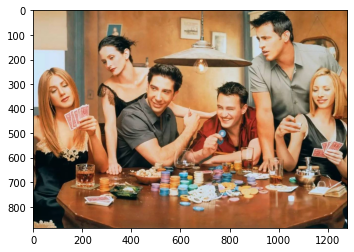

In [3]:
img=ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [4]:
faces=app.get(img)

/home/ariel/.cache/pypoetry/virtualenvs/src-2ezwFDKK-py3.8/lib/python3.8/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


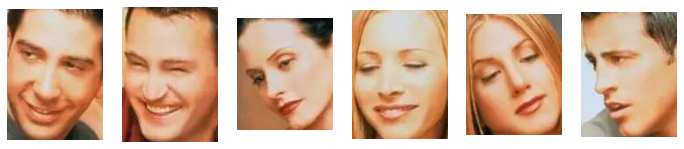

In [5]:
fig,axs=plt.subplots(1,6,figsize=(12,5))

for i,face in enumerate(faces):
    bbox=face['bbox']
    bbox=[int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

# Face swapping

In [48]:
swapper=insightface.model_zoo.get_model('inswapper_128.onnx',
                                        #download=False,
                                        #download_zip=False
                                        )

/home/ariel/.cache/pypoetry/virtualenvs/src-2ezwFDKK-py3.8/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


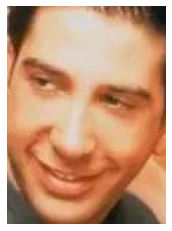

In [7]:
source_face=faces[0]
bbox_src=source_face['bbox']
bbox_src=[int(b) for b in bbox_src]
plt.imshow(img[bbox_src[1]:bbox_src[3],bbox_src[0]:bbox_src[2],::-1])
plt.axis('off')
plt.show()


In [8]:
res=img.copy()

for face in faces:
    res=swapper.get(res,face,source_face,paste_back=True)

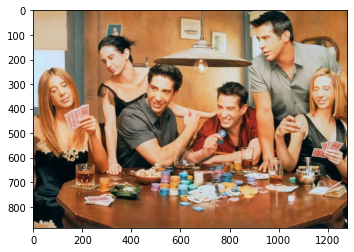

In [9]:
plt.imshow(res[:,:,::-1])
plt.show()

# Test_image

In [49]:
test_image=cv2.imread('test_image.jpeg')

In [50]:
faces=app.get(test_image)

/home/ariel/.cache/pypoetry/virtualenvs/src-2ezwFDKK-py3.8/lib/python3.8/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


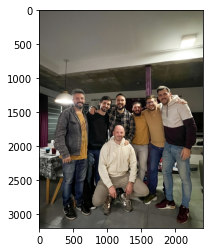

In [51]:
plt.imshow(test_image[:,:,::-1])
plt.show()

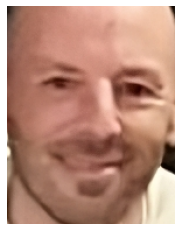

In [52]:
source_face_test=faces[5]
bbox_src=source_face_test['bbox']
bbox_src=[int(b) for b in bbox_src]
plt.imshow(test_image[bbox_src[1]:bbox_src[3],bbox_src[0]:bbox_src[2],::-1])
plt.axis('off')
plt.show()


In [53]:
len(faces)

7

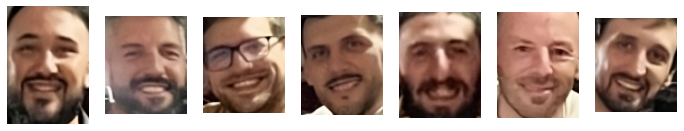

In [54]:
fig,axs=plt.subplots(1,7,figsize=(12,5))

for i,face in enumerate(faces):
    bbox=face['bbox']
    bbox=[int(b) for b in bbox]
    axs[i].imshow(test_image[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

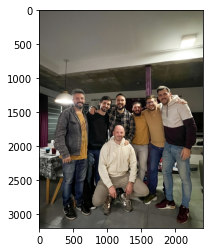

In [55]:
plt.imshow(test_image[:,:,::-1])

In [56]:
res_test_image=test_image.copy()

for face in faces:
    res_test_image=swapper.get(res_test_image,face,source_face_test,paste_back=True)

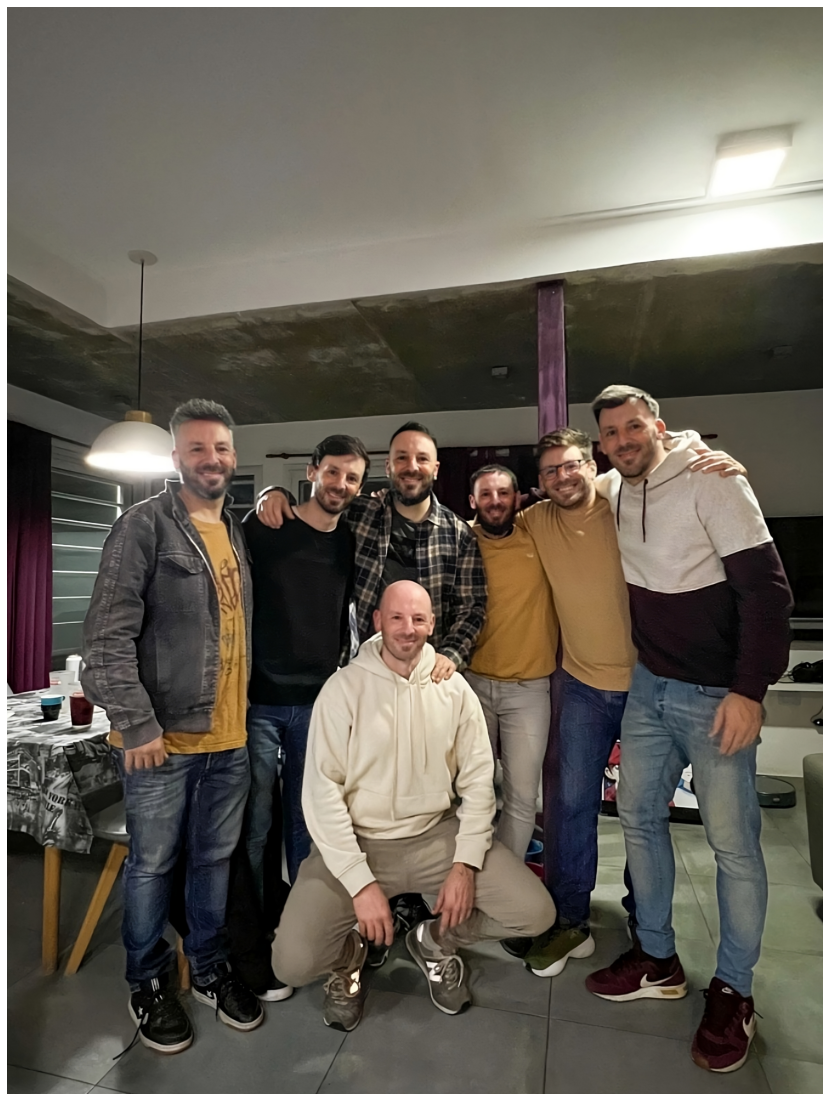

In [59]:
plt.figure(figsize=(20,20))
plt.imshow(res_test_image[:,:,::-1])
plt.axis('off')
plt.show()